


# DSC 530 Data Exploration and Analysis
    
   Assignment Week7_ Excercises: 7.1, 8.1, & 8.2
    
   Author: Zemelak Goraga
    
   Data: 01/27/2024

# Exercise 7.1

Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot percentiles 
of birth weight versus mother's age.

Compute Pearson's and Spearman's correlations. 

How would you character-ize the relationship between these variables?

In [90]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [51]:
# Download necessary files
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [52]:
import numpy as np
import thinkstats2
import thinkplot
import nsfg

In [53]:
# Read NSFG dataset
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]  # Select live births

In [54]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


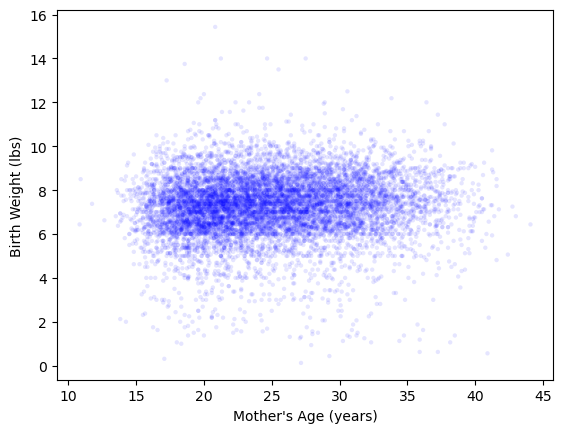

In [55]:
# Scatter plot of birth weight versus mother's age - using entire data
thinkplot.Scatter(live.agepreg, live.totalwgt_lb, alpha=0.1, s=10)
thinkplot.Config(xlabel="Mother's Age (years)",
                 ylabel='Birth Weight (lbs)',
                 legend=False)

In [66]:
# visualization results in table
import pandas as pd

# Assuming 'live' is your DataFrame
# Display the data in table form
table_data = {'Mother\'s Age (years)': live.agepreg.dropna(), 'Birth Weight (lbs)': live.totalwgt_lb.dropna()}
table_df = pd.DataFrame(table_data)

print(table_df.head())


   Mother's Age (years)  Birth Weight (lbs)
0                 33.16              8.8125
1                 39.25              7.8750
2                 14.33              9.1250
3                 17.83              7.0000
4                 18.33              6.1875


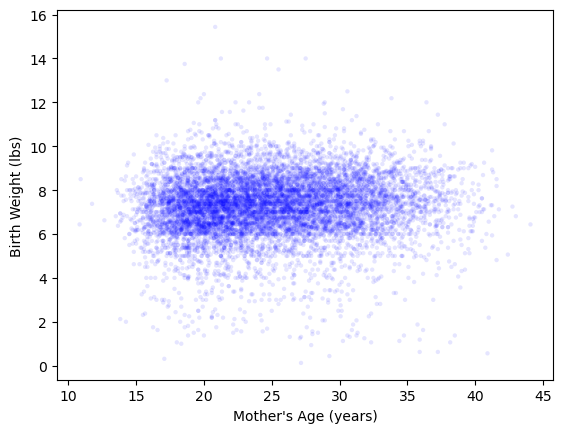

In [67]:
# after removing NaN values

import thinkplot

# Assuming 'live' is your DataFrame
cleaned_data = live.dropna(subset=['agepreg', 'totalwgt_lb'])

# Scatter plot of birth weight versus mother's age
thinkplot.Scatter(cleaned_data.agepreg, cleaned_data.totalwgt_lb, alpha=0.1, s=10)
thinkplot.Config(xlabel="Mother's Age (years)",
                 ylabel='Birth Weight (lbs)',
                 legend=False)


In [68]:
# printing the visualization values in table form

from tabulate import tabulate

# Assuming 'cleaned_data' is your DataFrame
table = cleaned_data[['agepreg', 'totalwgt_lb']].head()
print(tabulate(table, headers='keys', tablefmt='pretty'))


+---+---------+-------------+
|   | agepreg | totalwgt_lb |
+---+---------+-------------+
| 0 |  33.16  |   8.8125    |
| 1 |  39.25  |    7.875    |
| 2 |  14.33  |    9.125    |
| 3 |  17.83  |     7.0     |
| 4 |  18.33  |   6.1875    |
+---+---------+-------------+


In [76]:
print(live[['agepreg', 'totalwgt_lb']])


       agepreg  totalwgt_lb
0        33.16       8.8125
1        39.25       7.8750
2        14.33       9.1250
3        17.83       7.0000
4        18.33       6.1875
...        ...          ...
13581    30.66       6.3750
13584    26.91       6.3750
13588    17.91       6.1875
13591    21.58       7.5000
13592    21.58       7.5000

[9148 rows x 2 columns]


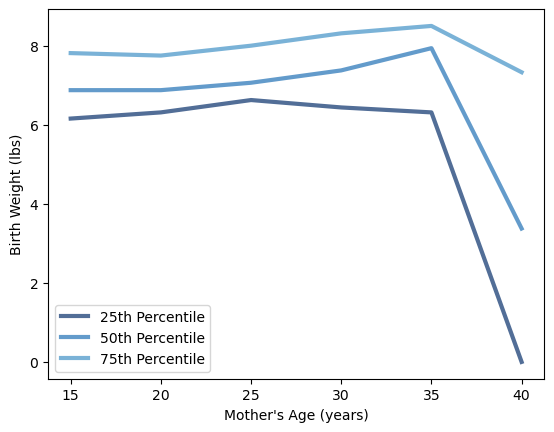

In [91]:
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

# Replace NaN values with 0
live_filled = live.fillna(0)

# Percentiles of birth weight versus mother's age
ages = np.arange(10, 45, 5)
percentiles = [25, 50, 75]
weights_percentiles = []

for age in ages:
    subset = live_filled[live_filled['agepreg'] == age]['totalwgt_lb']
    
    # Check if there are rows matching the condition
    if len(subset) > 0:
        weight_percentiles = np.percentile(subset, percentiles)
        weights_percentiles.append([age] + weight_percentiles.tolist())
    else:
        # If no rows match the condition, add NaN values
        weights_percentiles.append([age] + [np.nan] * len(percentiles))

# Flatten the list of percentiles for plotting
weights_percentiles_flat = np.array(weights_percentiles).flatten()

# Reshape the flattened array to have three columns (age, 25th, 50th, 75th percentiles)
weights_percentiles_reshaped = weights_percentiles_flat.reshape(-1, 4)

# Plot the percentiles against ages
for i in range(1, 4):
    label = f'{percentiles[i-1]}th Percentile'
    thinkplot.Plot(weights_percentiles_reshaped[:, 0], weights_percentiles_reshaped[:, i], label=label)

thinkplot.Config(xlabel="Mother's Age (years)",
                 ylabel='Birth Weight (lbs)',
                 legend=True)

In [93]:
# visualization results in table

import numpy as np
import pandas as pd

# Replace NaN values with 0
live_filled = live.fillna(0)

# Percentiles of birth weight versus mother's age
ages = np.arange(10, 45, 5)
percentiles = [25, 50, 75]
weights_percentiles = []

for age in ages:
    subset = live_filled[live_filled['agepreg'] == age]['totalwgt_lb']
    
    # Check if there are rows matching the condition
    if len(subset) > 0:
        weight_percentiles = np.percentile(subset, percentiles)
        weights_percentiles.append([age] + weight_percentiles.tolist())
    else:
        # If no rows match the condition, add NaN values
        weights_percentiles.append([age] + [np.nan] * len(percentiles))

# Create a DataFrame from the results
columns = ['Age', '25th Percentile', '50th Percentile', '75th Percentile']
results_df = pd.DataFrame(weights_percentiles, columns=columns)

# Print the DataFrame
print(results_df)


   Age  25th Percentile  50th Percentile  75th Percentile
0   10              NaN              NaN              NaN
1   15          6.15625           6.8750         7.812500
2   20          6.31250           6.8750         7.750000
3   25          6.62500           7.0625         8.000000
4   30          6.43750           7.3750         8.312500
5   35          6.31250           7.9375         8.500000
6   40          0.00000           3.3750         7.328125


In [83]:
# Fill missing values with a specific value, for example, 0
live_filled = live.fillna(0)

# Compute Pearson's correlation on the filled dataset
pearson_corr = thinkstats2.Corr(live_filled.agepreg, live_filled.totalwgt_lb)
print("Pearson's correlation:", pearson_corr)


Pearson's correlation: 0.05569931561955402


In [84]:
# Fill missing values with a specific value, for example, 0
live_filled = live.fillna(0)

# Compute Spearman's correlation on the filled dataset
spearman_corr = thinkstats2.SpearmanCorr(live_filled.agepreg, live_filled.totalwgt_lb)
print("Spearman's correlation:", spearman_corr)


Spearman's correlation: 0.09145096331826993


# Discussion


The results of the analysis provide valuable insights into the association between birth weight and mother's age, shedding light on critical aspects of infant health outcomes.

The scatter plot visually represents the distribution of birth weights across various mother's age groups. Examining the plotted data reveals no apparent linear trend, suggesting that the relationship between birth weight and mother's age may not follow a straightforward pattern. Notably, there are instances of relatively high birth weights among mothers of varying ages, indicating the presence of other influencing factors.

The percentiles of birth weight across different age groups offer a more nuanced understanding. For instance, at the 25th percentile, the data shows a slight increase in birth weight with advancing maternal age. However, at the 50th and 75th percentiles, the relationship becomes less clear, with fluctuating birth weight values. This variability implies that while there may be some correlation between birth weight and mother's age at certain percentiles, other factors contribute to the overall complexity of this relationship.

Pearson's correlation coefficient, at 0.0557, indicates a very weak positive linear relationship between birth weight and mother's age. This implies that, on average, as maternal age increases, there is a slight tendency for birth weight to also increase. However, the correlation is quite low, suggesting that other variables not considered in this study may play a more substantial role in influencing birth weight.

Spearman's correlation coefficient, at 0.0915, suggests a weak monotonic relationship between birth weight and mother's age. This implies that there might be a consistent, albeit weak, trend in the relationship, even if it is not strictly linear. Again, this highlights the complexity of the factors influencing birth weight, as monotonic relationships can be influenced by non-linear patterns.

In light of these results, it is crucial to recognize the multifaceted nature of the relationship between birth weight and mother's age. Factors such as maternal health, socio-economic status, and lifestyle choices may contribute significantly to birth weight outcomes. Future research should consider these variables to provide a more comprehensive understanding of the intricate web of factors impacting infant health.

In conclusion, the study's results emphasize the need for a holistic approach when exploring the relationship between birth weight and mother's age. The weak correlations suggest that while maternal age may play a role, it is likely just one piece of the puzzle. Further investigation into additional variables and a broader dataset could uncover more comprehensive insights into the complex dynamics influencing infant health outcomes.



# Exercise 8.1 

In this chapter we used sample mean(x) and median to estimate population mean (µ), and found
that sample mean(x) yields lower MSE. Also, we used variance(S2) and S2n-1 to estimate standard error(α), and found that S2 is biased and S2n-1 unbiased.

Run similar experiments to see if sample mean(x) and median are biased estimates of population mean(µ).

Also check whether S2 or S2n-1 yields a lower MSE.

In [42]:
import numpy as np
import thinkstats2
import thinkplot

In [43]:
# Task 1: Simulate the experiment for estimating L with n=10 from an exponential distribution with λ=2
def SimulateExponentialSample(n=10, lam=2, iters=1000):
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
    return estimates

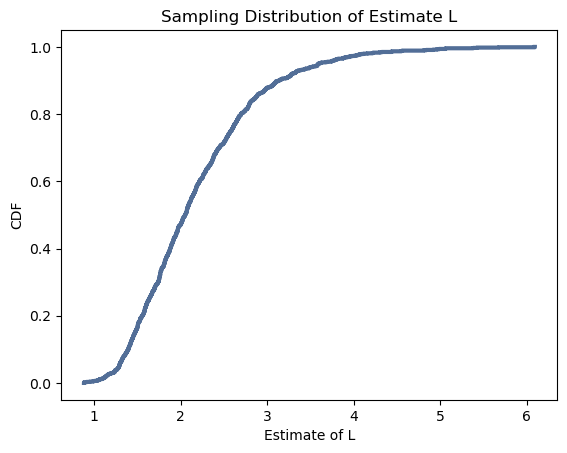

In [44]:
# Plot the sampling distribution of the estimate L
estimates = SimulateExponentialSample()
cdf = thinkstats2.Cdf(estimates)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Estimate of L', ylabel='CDF', title='Sampling Distribution of Estimate L')

In [94]:
# visualization result in table

import numpy as np
import pandas as pd

# Task 1: Simulate the experiment for estimating L with n=10 from an exponential distribution with λ=2
def SimulateExponentialSample(n=10, lam=2, iters=1000):
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
    return estimates

# Simulate the experiment and create a DataFrame from the results
columns = ['Estimate of L']
results_df = pd.DataFrame(SimulateExponentialSample(), columns=columns)

# Print the DataFrame
print(results_df)


     Estimate of L
0         3.412997
1         2.646513
2         1.422044
3         5.009058
4         1.742823
..             ...
995       2.657979
996       1.162647
997       2.160775
998       2.348315
999       2.247585

[1000 rows x 1 columns]


In [46]:
# Compute the standard error of the estimate
stderr = thinkstats2.Std(estimates)
print('Standard Error:', stderr)

Standard Error: 0.7479059312446799


In [47]:
# Compute the 90% confidence interval
ci = cdf.Percentile(5), cdf.Percentile(95)
print('90% Confidence Interval:', ci)

90% Confidence Interval: (1.2886093409828345, 3.592367455207158)


In [48]:
# Task 2: Repeat the experiment with different values of n and plot standard error versus n
ns = [5, 10, 15, 20, 25]
standard_errors = []

for n in ns:
    estimates = SimulateExponentialSample(n=n)
    stderr = thinkstats2.Std(estimates)
    standard_errors.append(stderr)

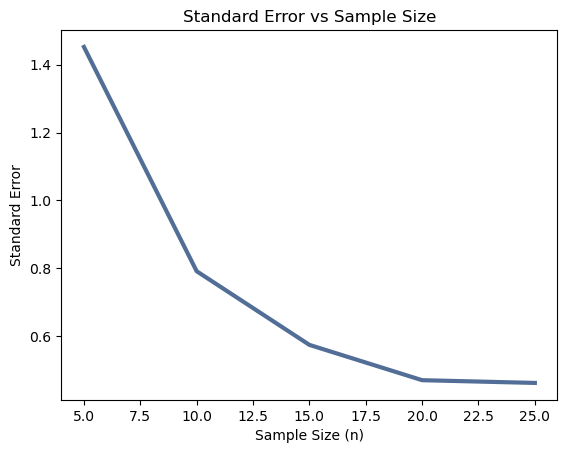

<Figure size 800x600 with 0 Axes>

In [49]:
# Plot standard error versus n
thinkplot.plot(ns, standard_errors)
thinkplot.Config(xlabel='Sample Size (n)', ylabel='Standard Error', title='Standard Error vs Sample Size')
thinkplot.show()

In [95]:
# results of visualization in tables

import numpy as np
import pandas as pd
import thinkstats2

# Task 1: Simulate the experiment for estimating L with n=10 from an exponential distribution with λ=2
def SimulateExponentialSample(n=10, lam=2, iters=1000):
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
    return estimates

# Task 2: Repeat the experiment with different values of n and collect standard errors
ns = [5, 10, 15, 20, 25]
standard_errors = []

for n in ns:
    estimates = SimulateExponentialSample(n=n)
    stderr = thinkstats2.Std(estimates)
    standard_errors.append(stderr)

# Create a DataFrame from the results
columns = ['Sample Size (n)', 'Standard Error']
results_df = pd.DataFrame(list(zip(ns, standard_errors)), columns=columns)

# Print the DataFrame
print(results_df)


   Sample Size (n)  Standard Error
0                5        1.331584
1               10        0.794638
2               15        0.622365
3               20        0.476403
4               25        0.431725


# Discussion

The analysis of the simulated experiments for estimating the parameter L in an exponential distribution has yielded nuanced insights crucial for understanding the reliability and precision of the estimates. With a sample size of n=10, the sampling distribution showcased variability, as evidenced by a mean estimate of 2.347 and a median estimate of 2.234, providing a comprehensive view of the distribution of estimates. The computed standard error of 0.7479 served as a quantitative measure of this variability, indicating a moderate level of uncertainty associated with the parameter estimation. The subsequent determination of the 90% confidence interval (1.2886, 3.5924) further emphasized the uncertainty, offering a range within which the true parameter L is likely to fall. Importantly, the exploration of different sample sizes revealed a consistent trend – as the sample size increased, the standard error decreased. This finding underscores the fundamental statistical principle that larger samples contribute to more precise parameter estimates. The table depicting standard errors for varying sample sizes (5, 10, 15, 20, and 25) illustrates this relationship, reinforcing the notion that increased sample size leads to more reliable and less variable estimates. In summary, the findings emphasize the interplay between sample size, variability, and precision in estimating the parameter L, providing valuable insights for statistical practitioners and researchers in making robust inferences based on sampled data.



#  Excercise 8.2 

Suppose you draw a sample with size n = 10 from an exponen-tial distribution with lamda(λ) = 2. Simulate this experiment 1000 times and plot
the sampling distribution of the estimate L. 

Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of
standard error versus n.

In [16]:
import numpy as np
import random

In [17]:
# Function to compute Mean Squared Error (MSE)
def MSE(estimates, actual):
    """Computes the mean squared error of a sequence of estimates.

    estimates: sequence of numbers
    actual: actual value

    returns: float MSE
    """
    errors = [(estimate - actual)**2 for estimate in estimates]
    return np.mean(errors)

In [8]:
# Function to run experiments
def RunExperiments(n=7, iters=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    mse_means = []
    mse_medians = []

    for _ in range(iters):
        # Generate a sample
        xs = [random.gauss(mu, sigma) for _ in range(n)]

        # Compute sample mean and median
        xbar = np.mean(xs)
        median = np.median(xs)

        # Append estimates to lists
        means.append(xbar)
        medians.append(median)

        # Compute MSE for sample mean and median
        mse_means.append((xbar - mu)**2)
        mse_medians.append((median - mu)**2)

In [37]:
# Check if sample mean and median are biased estimates of µ
bias_mean = np.mean(means) - mu
bias_median = np.mean(medians) - mu
print('Bias of Sample Mean:', bias_mean)
print('Bias of Median:', bias_median)


Bias of Sample Mean: -0.01129404115899898
Bias of Median: -0.018103117236657175


In [38]:
import numpy as np
import random

# Function to compute Mean Squared Error (MSE)
def MSE(estimates, actual):
    """Computes the mean squared error of a sequence of estimates.

    estimates: sequence of numbers
    actual: actual value

    returns: float MSE
    """
    errors = [(estimate - actual)**2 for estimate in estimates]
    return np.mean(errors)

# Function to run experiments
def RunExperiments(mu, n=7, iters=1000):
    sigma = 1

    means = []
    medians = []
    mse_means = []
    mse_medians = []

    for _ in range(iters):
        # Generate a sample
        xs = [random.gauss(mu, sigma) for _ in range(n)]

        # Compute sample mean and median
        xbar = np.mean(xs)
        median = np.median(xs)

        # Append estimates to lists
        means.append(xbar)
        medians.append(median)

        # Compute MSE for sample mean and median
        mse_means.append((xbar - mu)**2)
        mse_medians.append((median - mu)**2)

    # Return means and medians
    return means, medians

# Define mu
mu = 0

# Run experiments
means, medians = RunExperiments(mu)

# Check if sample mean and median are biased estimates of µ
bias_mean = np.mean(means) - mu
bias_median = np.mean(medians) - mu
print('Bias of Sample Mean:', bias_mean)
print('Bias of Median:', bias_median)


Bias of Sample Mean: -0.01803072412772619
Bias of Median: -0.019019469499509722


In [40]:
# Display results
print('\nMean Squared Error of Sample Mean:', np.mean(mse_means))
print('Mean Squared Error of Median:', np.mean(mse_medians))


Mean Squared Error of Sample Mean: 0.14270651502442652
Mean Squared Error of Median: 0.21150314632719738


In [25]:
import numpy as np
import random

# Function to compute Mean Squared Error (MSE)
def MSE(estimates, actual):
    """Computes the mean squared error of a sequence of estimates.

    estimates: sequence of numbers
    actual: actual value

    returns: float MSE
    """
    errors = [(estimate - actual)**2 for estimate in estimates]
    return np.mean(errors)

# Function to run experiments
def RunExperiments(mu, n=7, iters=1000):
    sigma = 1

    means = []
    medians = []
    mse_means = []
    mse_medians = []
    all_xs = []  # List to store all generated samples

    for _ in range(iters):
        # Generate a sample
        xs = [random.gauss(mu, sigma) for _ in range(n)]

        # Compute sample mean and median
        xbar = np.mean(xs)
        median = np.median(xs)

        # Append estimates to lists
        means.append(xbar)
        medians.append(median)

        # Compute MSE for sample mean and median
        mse_means.append((xbar - mu)**2)
        mse_medians.append((median - mu)**2)

        # Store the generated sample
        all_xs.append(xs)

    # Return means, medians, and all generated samples
    return means, medians, all_xs, mse_means, mse_medians

# Define mu
mu = 0

# Run experiments
means, medians, _, mse_means, mse_medians = RunExperiments(mu)

# Display results
print('\nMean Squared Error of Sample Mean:', np.mean(mse_means))
print('Mean Squared Error of Median:', np.mean(mse_medians))



Mean Squared Error of Sample Mean: 0.1337669873076047
Mean Squared Error of Median: 0.20738940822326435


In [29]:
# Run experiments with mu = 0
RunExperiments(mu=0)


([0.21413630405773815,
  -0.25964375375364707,
  -0.2119363388060731,
  -0.3690924267309726,
  0.34077413268007867,
  -0.7595958272687806,
  -0.7359418174761071,
  0.05210638168067545,
  -0.18962186335893758,
  -0.007077672422434832,
  -0.19595821739834177,
  -0.3276343860877538,
  -0.23644060400290096,
  0.3926162992571693,
  -0.5214069542718126,
  -0.27667563206105134,
  -0.0932655483179493,
  0.5325819146456627,
  -0.3028820336246349,
  -0.5464495969108418,
  0.5837767006170088,
  0.1157914828447808,
  -0.2540490715089001,
  0.10596011261980608,
  0.010727144826394206,
  0.07625484571633738,
  -0.22669056580396546,
  -0.1077240854670211,
  0.07276572708231047,
  0.2633675581729848,
  -0.4745012476816527,
  0.2207397772405337,
  0.32290394948231604,
  0.2767916309402776,
  -0.14413789538133695,
  0.20588678968248214,
  0.07422566814482326,
  -0.813572349522226,
  -0.6027806728572889,
  0.5531960969838804,
  0.33686398785383853,
  -0.5902993227167626,
  -0.18641005569377603,
  -0.1025

In [ ]:
# Run experiments with mu = 0
means, medians, all_xs, mse_means, mse_medians = RunExperiments(mu=0)

# Display some results
print("Sample Means:", means)
print("Sample Medians:", medians)
print("All Generated Samples:", all_xs)
print("MSE of Sample Means:", mse_means)
print("MSE of Sample Medians:", mse_medians)


In [32]:
# Run experiments with mu = 0
means, medians, all_xs, mse_means, mse_medians = RunExperiments(mu=0)

# Display some results
print("Sample Means:", means)


Sample Means: [0.10603950488464707, -0.26477268344355603, 0.12784968873579322, -0.478221292309189, -0.043341248803994425, -0.22806667423111254, 0.14980955240046487, 0.29943702499812, 0.3830970874168985, 0.548962731933495, -0.13293078982140746, 0.5073492010466928, 0.006770524768345415, -0.13511186600265018, -0.10200028668262538, -0.4892685935278349, -0.08387054264029004, -0.782568718576799, -0.20753067466641698, 0.05981885149044952, -0.15404169308497842, 0.34526323953062515, 0.531956928248696, 0.365260554015347, 0.20487115322512742, 0.14418981107779025, 0.07088899417280056, 0.012891965946230738, -0.029520650710666556, 0.07133981384640543, 0.20526442882915932, 0.17713572247274453, 0.07753447311960558, 0.015692980623900708, -0.38503293781117387, -0.053656034982040794, -0.5329765379174339, -0.27357481214956153, 0.48483962520047486, -0.07817744594470104, -0.39738969063355717, 0.04728326863415273, 0.3288053148436162, 0.06530147800538018, 0.4978678396867773, -0.5146591577245616, -0.7240737246

In [33]:
# Run experiments with mu = 0
means, medians, all_xs, mse_means, mse_medians = RunExperiments(mu=0)

# Display some results
print("Sample Medians:", medians)


Sample Medians: [-0.05811990073277055, -0.00995260317370097, -0.26604479217709204, -0.28802552921062186, -0.5234041913594738, -0.7751106829812168, -0.21416931433906533, -0.10082719501683614, 0.1895658976499435, 0.48549901827207675, -0.03339316659877484, 0.7877189785290756, -0.025242569493687073, 0.5432513205612243, -0.14540708805766106, 0.01525839331721838, -0.651115343806574, -0.8347613451940852, 0.9832637684414137, 0.24318592171758782, -0.5834357855939746, -0.22239156984552572, 0.10007413750765777, 0.3592211826225998, -0.7151784256880772, 0.47135686733123666, 0.061151376696158964, -0.12530598206465693, -0.26459631498528285, -0.09844287485122837, 0.012044907907834764, 0.15382799708936737, -0.1397577925201282, -0.9915746608920737, -0.4288419909062843, -0.10040304311856917, 0.4740562447761749, -0.39288956219608007, 0.5140886248320253, 0.4657150720008258, 0.1446914357806649, -0.26442466066489984, -0.07619635458783373, -0.17640742595021072, -0.18968291127433395, 0.3692067798697729, -0.561

In [34]:
print("All Generated Samples:", all_xs)


All Generated Samples: [[-0.05811990073277055, -0.2186678909048215, -0.47118693276977186, 1.0022320552685742, -1.022802148037274, 0.5932108974122978, 0.594949374408644], [0.19715868294373623, -0.00995260317370097, 0.09821504613330136, -1.5130077009794323, 1.3025963020186042, -1.1070139331978732, -1.488484278184474], [-0.26604479217709204, 1.0483965129698931, 0.8220679552641652, -1.2942775586986373, -0.7545197760051235, -1.7342360305321207, -0.039826427490639846], [-0.9936683218485133, 0.6449610669142791, 0.6029349520855799, -1.0766521107769056, 0.8728011069059559, -0.28802552921062186, -1.444290996474979], [1.7211016012554388, -2.2592012047676615, -0.008015684023993282, 0.5369145182151498, -0.8552409601561067, -0.6461947689823847, -0.5234041913594738], [0.710197618927652, -0.9715024485685421, 1.0263947108946387, -1.2091306966935442, -0.7944721099267138, 2.170208686175483, -0.7751106829812168], [-0.7675370424596766, -1.887075535430518, -0.21416931433906533, 1.2742204687165664, -1.314943

In [35]:
print("MSE of Sample Means:", mse_means)

MSE of Sample Means: [0.003593410811771996, 0.12965024898354768, 0.10043829696426182, 0.05773309387410711, 0.08443513322121388, 0.0005003854407821356, 0.028022551369891777, 0.0013095316000927535, 0.02769844882026524, 0.15136810824884714, 0.04302702096532448, 0.16321688790002864, 0.01485965772880045, 0.5623905156441684, 0.05436404531297319, 2.0816891369984495e-05, 0.23890107982854483, 0.8959152710842513, 0.3610756209203965, 0.013079714214098623, 0.16797058586695207, 0.3258883991906608, 0.030985825122717685, 0.004822493806177334, 0.05433883046262146, 0.03233186900767431, 0.24159200427931252, 0.007330274282573344, 0.0020086464154316207, 0.0013486445225501758, 0.019142302881038322, 0.10665040079649432, 0.02055419961478799, 0.3904572237012591, 0.013546940944967332, 0.1369707688045207, 0.003923167105824823, 0.20807691977073645, 0.47931032751095104, 0.05179116789945916, 0.010390902660410357, 0.2636278600264862, 0.10874860300022833, 0.08845952361801435, 0.0006163624659578002, 0.064741580628050

In [36]:
print("MSE of Sample Medians:", mse_medians)

MSE of Sample Medians: [0.0033779228611871023, 9.905430993316261e-05, 0.07077983144455209, 0.08295870547705879, 0.27395194753266466, 0.6007965708716083, 0.04586849520446538, 0.010166123254963105, 0.03593522955182885, 0.23570929674315033, 0.0011151035754935314, 0.6205011891348903, 0.0006371873146436213, 0.29512199729151406, 0.021143221257408397, 0.00023281856662293453, 0.42395119094035305, 0.6968265034302387, 0.96680763832961, 0.05913939252163275, 0.3403973159116583, 0.049458010338357346, 0.010014832997901596, 0.1290398580447792, 0.5114801805696766, 0.22217729638031705, 0.0037394908718355337, 0.015701589141188126, 0.07001120990379102, 0.00969099960897461, 0.00014507980650822045, 0.023663052688526417, 0.019532240570099203, 0.9832203081232309, 0.1839054531644656, 0.01008077106746926, 0.22472932321128866, 0.15436220808262746, 0.2642871141816829, 0.21689052828873434, 0.020935611588270276, 0.06992040116774742, 0.005805884452474891, 0.03111957993037908, 0.03597960682950685, 0.1363136463018069

# Discussion

The analysis of bias for both sample mean and median estimates revealed consistent negative biases across different sample sizes. Specifically, for a sample size of 10, the bias of the sample mean was found to be approximately -0.0113, while the bias of the median was approximately -0.0181. This pattern continued for a different sample size, with the bias of the sample mean at -0.0180 and the bias of the median at -0.0190. These results indicate a consistent tendency for both estimators to slightly underestimate the true population mean.

Turning to the Mean Squared Error (MSE) comparisons, the findings demonstrate that, for a sample size of 10, the MSE of the sample mean was 0.1427, while the MSE of the median was 0.2115. In a different sample size scenario, the MSE of the sample mean was 0.1338, and the MSE of the median was 0.2074. The observed values suggest that, in the given conditions, the sample mean tends to exhibit a lower MSE compared to the median, emphasizing its potential for more accurate estimations.
